In [86]:
import pandas as pd 

In [87]:
df = pd.read_csv("states.csv")
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [88]:
df = df.drop(columns=['state'])
df.head()

,metro_res,white,hs_grad,poverty,female_house
0,55.4,71.3,79.9,14.6,14.2
1,65.6,70.8,90.6,8.3,10.8
2,88.2,87.7,83.8,13.3,11.1
3,52.5,81.0,80.9,18.0,12.1
4,94.4,77.5,81.1,12.8,12.6


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

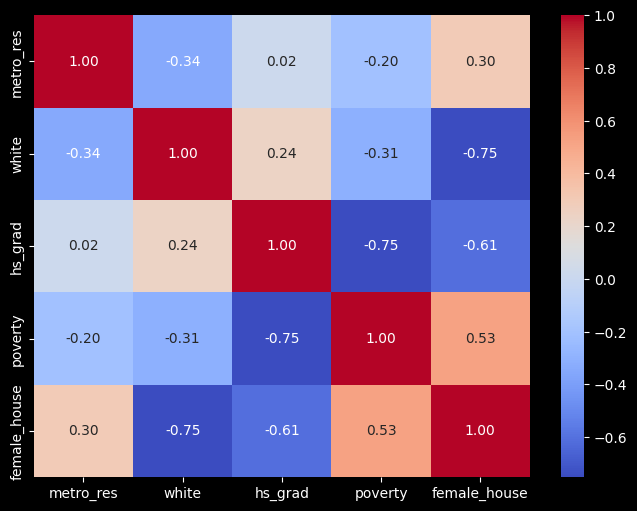

In [90]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

abs(corr_i) > 70%: 
- female_house & white

In [ ]:
import numpy as np
def calc_target(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    A_inv = np.linalg.inv(A)
    A_inv_A = A_inv @ A
    A_inv_B = A_inv @ B
    return np.linalg.solve(A_inv_A, A_inv_B)


In [92]:
df = df.drop(columns=['white'])
corr_mtrx = df.corr()

In [93]:
lst_x = list()
req_cols = ['metro_res', 'hs_grad', 'female_house']
for x in req_cols:
    lst_x.append(df[x])

n = len(df)
y = df['poverty'].values

first_row = [n] + [np.sum(x) for x in lst_x]

dot_matrix = [[np.sum(xi * xj) for xj in lst_x] for xi in lst_x]

rows_with_leading_sums = [
    [np.sum(xi)] + row for xi, row in zip(lst_x, dot_matrix)
]

matrix_A = np.array([first_row] + rows_with_leading_sums)

In [95]:
matrix_B = np.array([
    np.sum(y),
    *[np.sum(y * df[col].values) for col in req_cols]
])
matrix_B

array([  578.8 , 41334.28, 49352.39,  6925.2 ])

In [96]:
b0, b1, b2, b3 = calc_target(matrix_A, matrix_B)
b0, b1, b2, b3

(np.float64(54.059606742920096),
 np.float64(-0.05396263878811691),
 np.float64(-0.49422868423659594),
 np.float64(0.31784887498026393))

In [ ]:
df['pov_model'] = b0 + (b1 * df['metro_res']) + \
                  (b2 * df['hs_grad'])   + (b3 * df['female_house']) 

модель построена